## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 4.7: Barnard 68 in optical (dark cloud) and submillimeter (emission)

#### uses Pan-STARRS and Herschel fits files in b68_data.tar.gz
#### reproject.py from https://pypi.org/project/reproject/
#### and img_scale.py from https://www.astrobetter.com/wiki/RGB+Images+with+matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import img_scale
%matplotlib inline

In [ ]:
import sys
!{sys.executable} -m pip install reproject
from reproject import reproject_interp
from reproject import reproject_exact

In [4]:
# ignore warnings (only used here because the headers have deprecated keywords that cause a lot of verbage)
import warnings
warnings.simplefilter("ignore")

img_scale : log
img_scale : linear


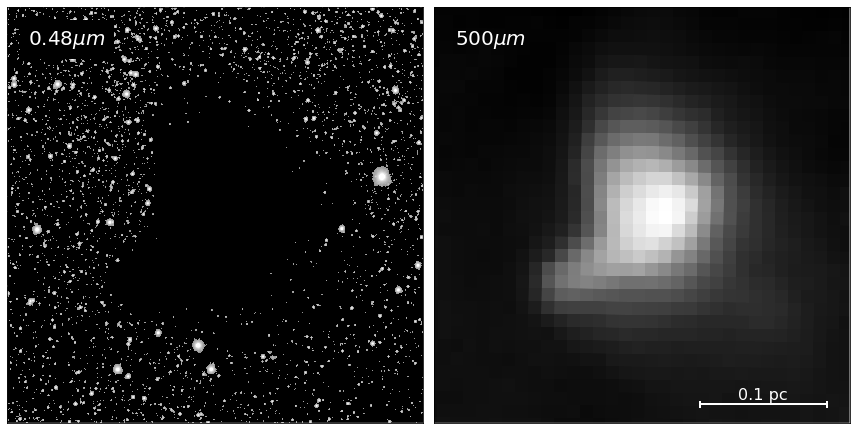

In [5]:
fig = plt.figure(figsize=(12,7))

#hdu1 = fits.open('b68_dss.fits')[0]
hdu1 = fits.open('b68_panstarrs_g.fits')[0]
wcs1 = WCS(hdu1)
ax1 = fig.add_subplot(121, projection=wcs1)
im1 = hdu1.data
hd1 = hdu1.header
ax1.imshow(img_scale.log(im1,scale_min=500,scale_max=50000), cmap='gray', origin='lower')

hdu2 = fits.open('b68_spire500.fits')[1]
data_trans, _ = reproject_exact(hdu2, hd1)
hdu_trans = fits.PrimaryHDU(data=data_trans, header=hd1)
wcs2 = WCS(hdu_trans.header)
im2 = hdu_trans.data
ax2 = fig.add_subplot(122, projection=wcs2)
ax2.imshow(img_scale.linear(im2, scale_min=3, scale_max=60), cmap='gray', origin='lower')

# scale bar
dx = hd1['CDELT1']
#print(dx)
# 0.25 arcsec per pixel

ny, nx = im2.shape
ax2.set_xlim(0,nx-1)
ax2.set_ylim(0,ny-1)
#print(nx,ny)

# 0.05 pc = 69 arcsec at 150 pc = 275 pix
xbar = 550
x0 = 1150
x1 = x0 + xbar
y0 = 80
dy = 10
ax2.plot([x0,x1],[y0,y0], 'w-', lw=2)
ax2.plot([x0,x0],[y0-dy,y0+dy], 'w-', lw=2)
ax2.plot([x1,x1],[y0-dy,y0+dy], 'w-', lw=2)
ax2.text(x0+0.5*xbar, y0+2*dy, '0.1 pc', color='white', fontsize=16, ha='center')

for i in (0,1):
    ax1.coords[i].set_ticks_visible(False)
    ax1.coords[i].set_ticklabel_visible(False)
    ax1.coords[i].set_ticks_visible(False)
    ax1.coords[i].set_ticklabel_visible(False)
    ax1.coords[i].set_axislabel('')
    ax1.coords[i].set_axislabel('')
    ax2.coords[i].set_ticks_visible(False)
    ax2.coords[i].set_ticklabel_visible(False)
    ax2.coords[i].set_ticks_visible(False)
    ax2.coords[i].set_ticklabel_visible(False)
    ax2.coords[i].set_axislabel('')
    ax2.coords[i].set_axislabel('')
ax1.text(0.05, 0.91, r'0.48$\mu m$', {'color': 'white', 'backgroundcolor': 'black', 'fontsize': 20}, transform=ax1.transAxes)
ax2.text(0.05, 0.91, r'500$\mu m$', {'color': 'white', 'fontsize': 20}, transform=ax2.transAxes)

plt.tight_layout()
plt.savefig('b68_emission.pdf')